In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [33]:
def f(x,y):
    return x + 2*y

In [34]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [35]:
N = 100
t = np.linspace(0,4,N)
yext = Solucion(t)

In [36]:
def GetEuler(f,x,y0):
    
    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    y[0] = y0
    
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1]+h*k1
        
    return y

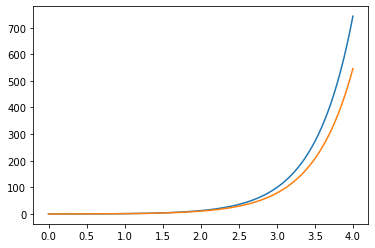

In [37]:
yrk1 = GetEuler(f,t,0)
plt.plot(t,yext)
plt.plot(t,yrk1)

In [38]:
def GetRK4(f,x,y0):
    
    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    y[0] = y0
    
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)
        
    return y

In [42]:
yrk4 = GetRK4(f,t,0)

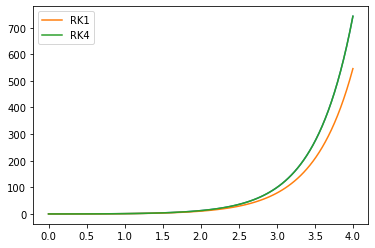

In [43]:
plt.plot(t,yext)
plt.plot(t,yrk1,label='RK1')
plt.plot(t,yrk4,label='RK4')
plt.legend()


In [44]:
def GetAdams(f,x,yrk4):
    
    h = x[1] - x[0]
    
    y = yrk4.copy()
    
    yc = y.copy()
    
    for i in range(5,len(x)):
        
        y[i] = y[i-1] + h*(1901*f(x[i-1],y[i-1]) - 2774*f(x[i-2],y[i-2]) + 2616*f(x[i-3],y[i-3]) - 1274*f(x[i-4],y[i-4]) + 251*f(x[i-5],y[i-5]))/720
        
        yc[i] = y[i]    
        
        # Moulton 2 orden
       # yc[i] = yc[i-1] + 0.5*h*( f(x[i],y[i]) +  f(x[i-1],y[i-1]) )
        
        # Moulton 3 orden
        yc[i] = yc[i-1] + h*( 475*f(x[i],y[i]) + 1427*f(x[i-1],y[i-1]) - 798*f(x[i-2],y[i-2]) + 482*f(x[i-3],y[i-3]) - 173*f(x[i-4],y[i-4]) + 27*f(x[i-5],y[i-5]))/1440
        
    
    return y,yc

In [45]:
ybash4,ymoulton5 = GetAdams(f,t,yrk4)

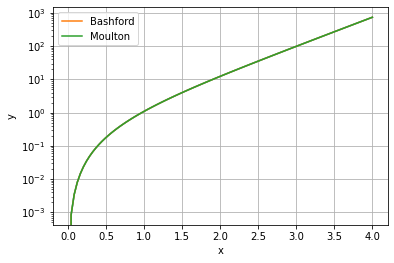

In [51]:
plt.semilogy(t,yext)
plt.semilogy(t,ybash4,label='Bashford')
plt.semilogy(t,ymoulton5,label='Moulton')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

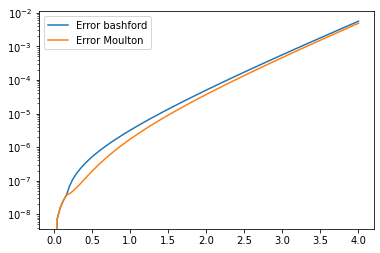

In [55]:
plt.semilogy(t,np.abs(yext-ybash4), label='Error bashford')
plt.semilogy(t,np.abs(yext-ymoulton5), label='Error Moulton')
plt.legend()